In [1]:
import os
def mkdir(p):
    if not os.path.exists(p):
        os.mkdir(p)
def link(src,dst):
    if not os.path.exists(dst):
        os.symlink(src,dst,target_is_directory=True)
mkdir("/home/abhijan/Downloads/fruits/fruits-360")

classes=[
    'Apple Golden 1',
    'Avocado',
    'Lemon',
    'Mango',
    'Kiwi',
    'Banana',
    'Strawberry',
    'Raspberry'
]
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

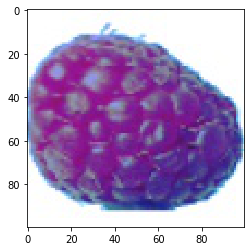

In [2]:
IMAGE_SIZE=[100,100]
epochs=5
batch_size=32
train_path='/home/abhijan/Downloads/fruits/fruits-360/Training'
valid_path='/home/abhijan/Downloads/fruits/fruits-360/Test'

image_files=glob(train_path+'/*/*.jp*g')
valid_image_files=glob(valid_path+'/*/*.jp*g')
folders=glob(train_path+'/*')

plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [3]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
for layer in vgg.layers:
    layer.trainable=False



In [4]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)

In [5]:
model=Model(inputs=vgg.inputs,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [6]:
gen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

In [7]:
test_gen=gen.flow_from_directory(valid_path,target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels=[None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v]=k
    

Found 20618 images belonging to 120 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Dates': 35, 'Eggplant': 36, 'Ginger Root': 37, 'Granadilla': 38, 'Grape Blue': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grape White 2': 42, 'Grape White 3': 43, 'Grape White 4': 44, 'Grapefruit Pink': 45, 'Grapefruit White': 46, 'Guava': 47, 'Hazelnut': 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -93.82676 max: 151.061


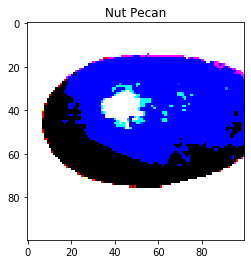

In [8]:
for x,y in test_gen:
    print("min:",x[0].min(),"max:",x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [9]:
train_generator=gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size
)
valid_generator=gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size
)

Found 60486 images belonging to 120 classes.
Found 20618 images belonging to 120 classes.


In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
r=model.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    steps_per_epoch=len(image_files)//batch_size,
    validation_steps=len(valid_image_files)//batch_size
)

Epoch 1/5
 466/1890 [======>.......................] - ETA: 4:15:23 - loss: 0.1989 - acc: 0.9838